In [219]:
from pyspark.sql import SparkSession, functions as F, types

paths = ["s3://nyc-tlc/trip data/g*19-0[5-9].csv","s3://nyc-tlc/trip data/g*19-[1-2][0-9].csv", "s3://nyc-tlc/trip data/g*20-0[1-5].csv"]

df_green = (
    spark.read.option("delimiter", ",")
    .csv(
        paths,
        header=True,
    )
    .select("lpep_pickup_datetime", "lpep_dropoff_datetime", "trip_distance")
)

paths = ["s3://nyc-tlc/trip data/y*19-0[5-9].csv","s3://nyc-tlc/trip data/y*19-[1-2][0-9].csv", "s3://nyc-tlc/trip data/y*20-0[1-5].csv"]

df_yellow = (
    spark.read.option("delimiter", ",")
    .csv(
        paths,
        header=True,
    )
    .select("tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance")
)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [221]:

df_green = df_green.withColumnRenamed("lpep_pickup_datetime", "pickup_time").withColumnRenamed(
    "lpep_dropoff_datetime", "drop_time"
)

df_yellow = df_yellow.withColumnRenamed("tpep_pickup_datetime", "pickup_time").withColumnRenamed(
    "tpep_dropoff_datetime", "drop_time"
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [222]:
df_yellow.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+-------------+
|        pickup_time|          drop_time|trip_distance|
+-------------------+-------------------+-------------+
|2019-05-01 00:14:50|2019-05-01 00:16:48|          .00|
|2019-05-01 00:35:54|2019-05-01 00:37:27|         1.50|
|2019-05-01 00:37:45|2019-05-01 00:37:49|         1.50|
|2019-05-01 00:44:57|2019-05-01 00:50:11|          .70|
|2019-05-01 00:59:48|2019-05-01 01:10:22|         2.00|
+-------------------+-------------------+-------------+
only showing top 5 rows

In [223]:
df_green.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+-------------+
|        pickup_time|          drop_time|trip_distance|
+-------------------+-------------------+-------------+
|2019-05-01 00:48:55|2019-05-01 00:55:07|         1.50|
|2019-05-01 00:53:04|2019-05-01 01:09:10|         3.56|
|2019-05-01 00:34:24|2019-05-01 00:46:36|         2.23|
|2019-05-01 00:42:50|2019-05-01 00:49:20|         1.70|
|2019-05-01 00:12:53|2019-05-01 00:16:03|          .60|
+-------------------+-------------------+-------------+
only showing top 5 rows

In [ ]:
df_yellow = df_yellow.withColumn('color', F.lit('yellow'))
df_green = df_green.withColumn('color', F.lit('green'))
df = df_green.union(df_yellow)

In [225]:
time_diff = (F.unix_timestamp("drop_time") - F.unix_timestamp("pickup_time")).cast(types.DoubleType()) / 3600
df = df.withColumn("duration", time_diff)
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+-------------+-----+-------------------+
|        pickup_time|          drop_time|trip_distance|color|           duration|
+-------------------+-------------------+-------------+-----+-------------------+
|2019-05-01 00:48:55|2019-05-01 00:55:07|         1.50|green|0.10333333333333333|
|2019-05-01 00:53:04|2019-05-01 01:09:10|         3.56|green| 0.2683333333333333|
|2019-05-01 00:34:24|2019-05-01 00:46:36|         2.23|green|0.20333333333333334|
|2019-05-01 00:42:50|2019-05-01 00:49:20|         1.70|green|0.10833333333333334|
|2019-05-01 00:12:53|2019-05-01 00:16:03|          .60|green|0.05277777777777778|
+-------------------+-------------------+-------------+-----+-------------------+
only showing top 5 rows

In [226]:
velocity = (F.col("trip_distance").cast(types.DoubleType()) / F.col("Duration"))
df = df.withColumn("velocity", velocity)
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+-------------+-----+-------------------+------------------+
|        pickup_time|          drop_time|trip_distance|color|           duration|          velocity|
+-------------------+-------------------+-------------+-----+-------------------+------------------+
|2019-05-01 00:48:55|2019-05-01 00:55:07|         1.50|green|0.10333333333333333|14.516129032258064|
|2019-05-01 00:53:04|2019-05-01 01:09:10|         3.56|green| 0.2683333333333333|13.267080745341616|
|2019-05-01 00:34:24|2019-05-01 00:46:36|         2.23|green|0.20333333333333334|10.967213114754099|
|2019-05-01 00:42:50|2019-05-01 00:49:20|         1.70|green|0.10833333333333334|15.692307692307692|
|2019-05-01 00:12:53|2019-05-01 00:16:03|          .60|green|0.05277777777777778|11.368421052631579|
+-------------------+-------------------+-------------+-----+-------------------+------------------+
only showing top 5 rows

In [227]:
df.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+-------------------+-----------------+--------+------------------+-----------------+
|summary|        pickup_time|          drop_time|    trip_distance|   color|          duration|         velocity|
+-------+-------------------+-------------------+-----------------+--------+------------------+-----------------+
|  count|           75628919|           75628919|         75628919|75628919|          75628919|         75555318|
|   mean|               null|               null|3.116442897722704|    null|0.3008853979961517|12.93179277342458|
| stddev|               null|               null|101.7919148442046|    null|1.5444150721722598|367.1418383341467|
|    min|2001-01-01 00:02:08|2001-01-01 01:00:02|             -.01|   green|        -6143.7925|       -113235.96|
|    max|2090-12-31 06:41:26|2090-12-31 07:18:49|         99989.95|  yellow| 696.5902777777778|2149584.311688312|
+-------+-------------------+-------------------+-----------------+--------+------------

In [228]:
df = df.filter(df.trip_distance > 0).filter(df.duration > 0)
df = df.filter(df.velocity > 0).filter(df.velocity < 300)
date_from = "2019-05-01"
date_to = "2020-05-31"
df = df.filter(df.pickup_time >= date_from).filter(df.pickup_time <= date_to)
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+-------------+-----+-------------------+------------------+
|        pickup_time|          drop_time|trip_distance|color|           duration|          velocity|
+-------------------+-------------------+-------------+-----+-------------------+------------------+
|2019-05-01 00:48:55|2019-05-01 00:55:07|         1.50|green|0.10333333333333333|14.516129032258064|
|2019-05-01 00:53:04|2019-05-01 01:09:10|         3.56|green| 0.2683333333333333|13.267080745341616|
|2019-05-01 00:34:24|2019-05-01 00:46:36|         2.23|green|0.20333333333333334|10.967213114754099|
|2019-05-01 00:42:50|2019-05-01 00:49:20|         1.70|green|0.10833333333333334|15.692307692307692|
|2019-05-01 00:52:08|2019-05-01 01:10:14|         4.40|green| 0.3016666666666667|14.585635359116022|
+-------------------+-------------------+-------------+-----+-------------------+------------------+
only showing top 5 rows

In [230]:
print("Avg velocity over the year:\n")
print(df.groupBy().avg("Velocity").collect()[0])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Avg velocity over the year:

Row(avg(Velocity)=12.33608186158554)

In [231]:

df_by_month  = (df
    .groupBy([df['color'],F.year("pickup_time").alias('year'),F.month("pickup_time").alias("month")])
    .agg(F.avg("velocity").alias('avg_velocity')))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [232]:
df_by_month.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----+-----+------------------+
| color|year|month|      avg_velocity|
+------+----+-----+------------------+
| green|2020|    2| 13.39867275420931|
| green|2019|    8|13.310031430596654|
| green|2020|    5|18.577469721581693|
|yellow|2020|    5|17.920369720321972|
|yellow|2020|    3|13.106150196880956|
| green|2019|    5|12.167000145675736|
|yellow|2019|    8|12.824804092059969|
| green|2020|    1| 13.75419046325859|
| green|2019|   11|12.792146785793038|
|yellow|2019|    7|12.560581839512754|
| green|2019|   12|12.845925578358438|
|yellow|2020|    1| 12.83425328739818|
|yellow|2019|   12|11.941183153652679|
|yellow|2020|    2|12.315510928297394|
| green|2019|    9|12.861671168939269|
| green|2019|    7|13.021629891169196|
| green|2019|   10|12.778394893666553|
|yellow|2020|    4| 18.10060625345453|
| green|2019|    6|12.252232750529526|
|yellow|2019|   11| 11.80506435133364|
+------+----+-----+------------------+
only showing top 20 rows

In [233]:
n = df_by_month.count()
print(n)
rows = df_by_month.take(n)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

26

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

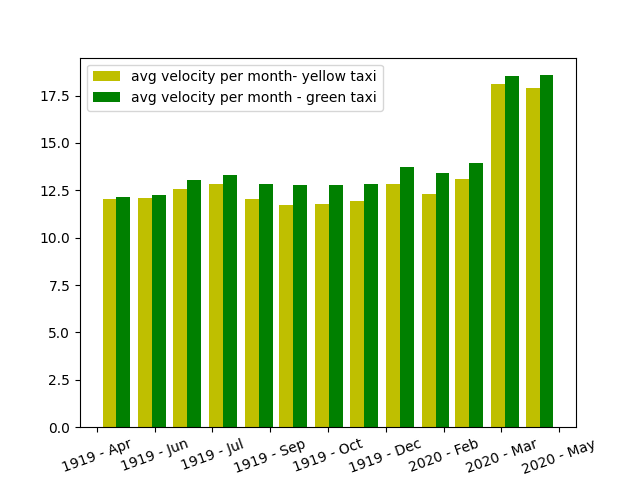

In [253]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

dates_yellow,dates_green = [],[]
means_yellow, means_green = [],[]
for row in rows:
    if row.color == 'yellow':
        dates_yellow.append(datetime.datetime(row.year, row.month,1))
        means_yellow.append(row.avg_velocity)
    else:
        dates_green.append(datetime.datetime(row.year, row.month,1))
        means_green.append(row.avg_velocity)


fig,ax = plt.subplots()
dates_yellow = date2num(dates_yellow)
dates_green = date2num(dates_green)
ax.bar(dates_yellow-6, means_yellow, width=12, color='y', align='center',  label = 'avg velocity per month- yellow taxi')
ax.bar(dates_green+6, means_green, width=12, color='g', align='center',  label = 'avg velocity per month - green taxi')
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%y%y - %b')
ax.xaxis.set_major_formatter(myFmt)
plt.legend()

plt.xticks(rotation=20)
%matplot plt


In [254]:
df_by_day = df.withColumn("basic_date", F.to_date(F.col("pickup_time")))
df_by_day = (df_by_day
    .groupBy([df_by_day['color'],df_by_day['basic_date']])
    .agg(F.avg("velocity").alias('avg_velocity')))
df_by_day.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+------------------+
|color|basic_date|      avg_velocity|
+-----+----------+------------------+
|green|2019-10-09|13.979639605060786|
|green|2019-11-13|12.176458117372079|
|green|2019-10-27|14.449962195356601|
|green|2019-10-30| 12.45459184559946|
|green|2020-03-06| 12.01114870462135|
+-----+----------+------------------+
only showing top 5 rows

In [256]:
n = df_by_day.count()
print(n)
rows = df_by_day.take(n)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

792

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

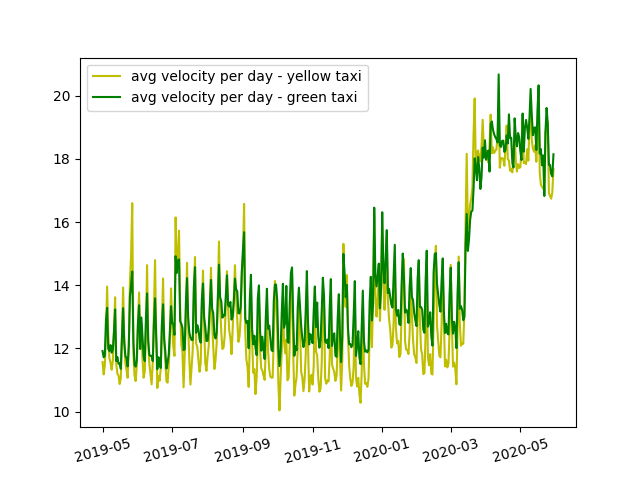

In [257]:
yellow_data, green_data = [],[]

for row in rows:
    if row.color == 'yellow':
        yellow_data.append((row.basic_date,row.avg_velocity))
    else:
        green_data.append((row.basic_date,row.avg_velocity))
yellow_data = sorted(yellow_data, key = lambda x: x[0])
green_data = sorted(green_data, key = lambda x: x[0])
dates_yellow, means_yellow = list(zip(*yellow_data))
dates_green, means_green = list(zip(*green_data))
fig, ax = plt.subplots()
ax.plot(dates_yellow, means_yellow, 'y', label = 'avg velocity per day - yellow taxi')
ax.plot(dates_green, means_green, 'g', label = 'avg velocity per day - green taxi')
plt.legend()
plt.xticks(rotation=15)
%matplot plt
    